# Importing Libraries

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.metrics import r2_score 
from sklearn import preprocessing

# Loading Data

In [21]:
data = pd.read_csv('CE802_P3_Data.csv')
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.32,5.72,-13.83,High,UK,0.03,-200.46,122.09,-2.96,6,2.67,8,607.14,19.19,10523.40,-635.80,1051.99
1,-29.38,8.20,-11.07,Medium,UK,56.97,-427.78,74.25,-22.94,4,3.84,10,867.03,12.65,10037.04,-469.73,816.64
2,2.46,20.32,-7.59,Low,Rest,45.00,-329.02,96.98,-10.90,4,13.14,8,-153.66,13.01,15100.28,-662.31,3241.77
3,16.33,2.76,-8.40,High,Rest,0.12,-196.88,42.45,-12.16,12,1.29,6,1461.87,9.19,22518.15,-1100.35,0.00
4,-14.93,9.98,-5.28,Medium,USA,557.61,-249.50,76.25,-20.54,8,2.58,2,-433.89,18.44,20111.46,-752.48,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-58.26,7.90,-26.52,High,Europe,1.95,-220.48,43.35,-16.14,8,42.69,8,175.98,14.41,16245.14,-721.31,603.30
1496,-52.83,3.06,-11.25,High,USA,3.12,-191.54,81.12,-13.12,2,11.91,6,-810.09,17.36,15345.11,-900.86,0.00
1497,-21.87,5.56,0.15,Very low,Rest,0.06,-167.14,127.47,-9.64,10,16.17,10,-800.91,14.25,12910.41,-332.72,1070.63
1498,5.24,2.04,1.83,Very high,USA,8.85,-236.68,114.56,-24.24,8,4.50,10,-169.98,12.25,16347.86,-1210.51,0.00


# Prepare Data(Dealing with categorical values)

In [22]:
data = pd.get_dummies(data, columns= ['F5'])
data.head()

,F1,F2,F3,F4,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target,F5_Europe,F5_Rest,F5_UK,F5_USA
0,-39.32,5.72,-13.83,High,0.03,-200.46,122.09,-2.96,6,2.67,8,607.14,19.19,10523.40,-635.80,1051.99,0,0,1,0
1,-29.38,8.20,-11.07,Medium,56.97,-427.78,74.25,-22.94,4,3.84,10,867.03,12.65,10037.04,-469.73,816.64,0,0,1,0
2,2.46,20.32,-7.59,Low,45.00,-329.02,96.98,-10.90,4,13.14,8,-153.66,13.01,15100.28,-662.31,3241.77,0,1,0,0
3,16.33,2.76,-8.40,High,0.12,-196.88,42.45,-12.16,12,1.29,6,1461.87,9.19,22518.15,-1100.35,0.00,0,1,0,0
4,-14.93,9.98,-5.28,Medium,557.61,-249.50,76.25,-20.54,8,2.58,2,-433.89,18.44,20111.46,-752.48,0.00,0,0,0,1


In [23]:
cl = {"F4": {"Very low":0, "Low":1, "Medium":2,"High":3,"Very high":4}}
data.replace(cl, inplace=True)
data.head()

,F1,F2,F3,F4,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target,F5_Europe,F5_Rest,F5_UK,F5_USA
0,-39.32,5.72,-13.83,3,0.03,-200.46,122.09,-2.96,6,2.67,8,607.14,19.19,10523.40,-635.80,1051.99,0,0,1,0
1,-29.38,8.20,-11.07,2,56.97,-427.78,74.25,-22.94,4,3.84,10,867.03,12.65,10037.04,-469.73,816.64,0,0,1,0
2,2.46,20.32,-7.59,1,45.00,-329.02,96.98,-10.90,4,13.14,8,-153.66,13.01,15100.28,-662.31,3241.77,0,1,0,0
3,16.33,2.76,-8.40,3,0.12,-196.88,42.45,-12.16,12,1.29,6,1461.87,9.19,22518.15,-1100.35,0.00,0,1,0,0
4,-14.93,9.98,-5.28,2,557.61,-249.50,76.25,-20.54,8,2.58,2,-433.89,18.44,20111.46,-752.48,0.00,0,0,0,1


# Plotting Correlation Heatmap

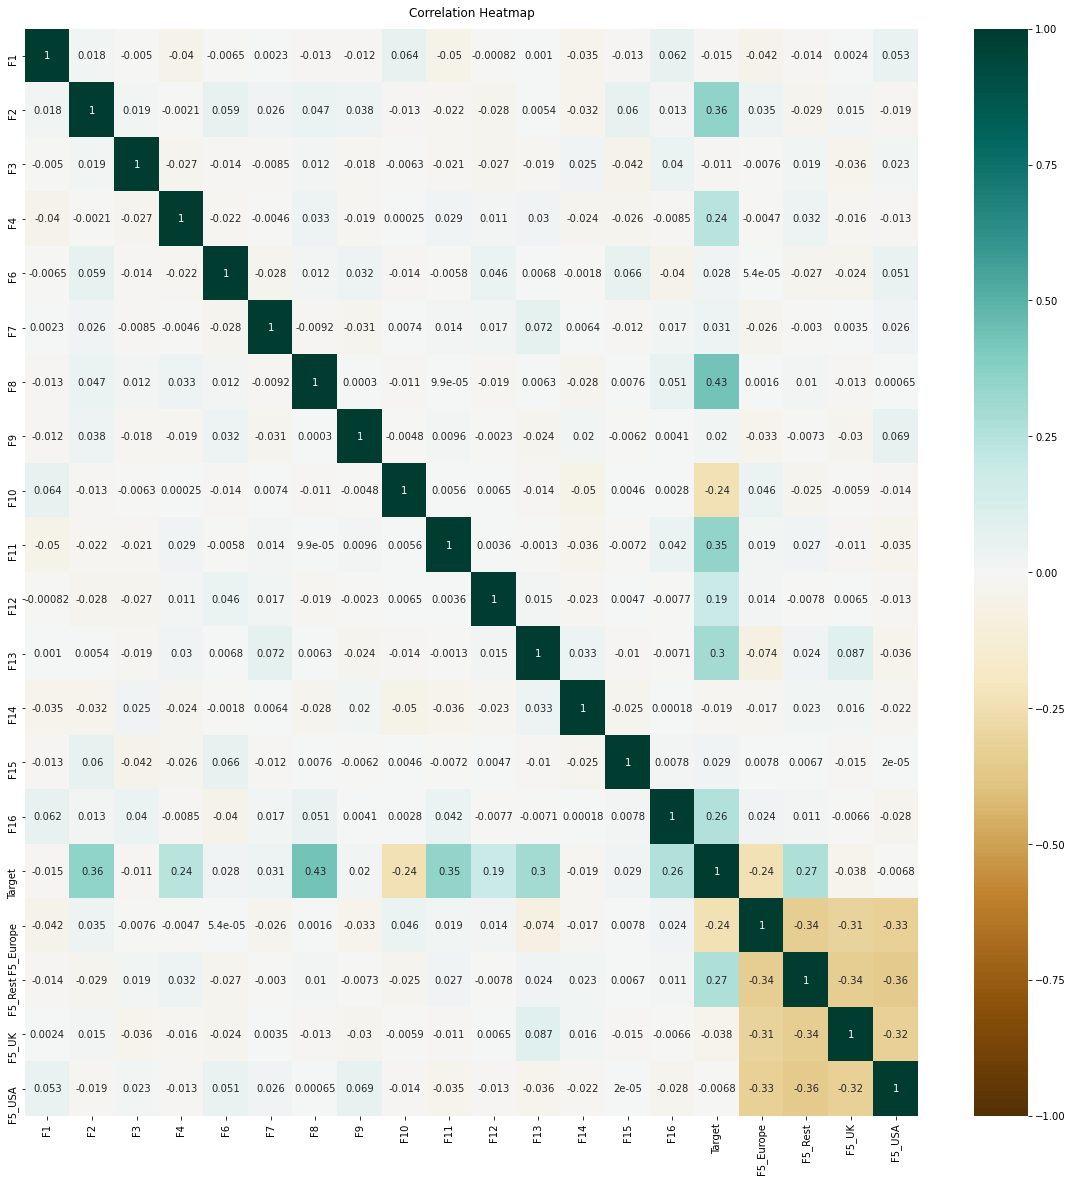

In [10]:
plt.figure(figsize=(20,20))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# DATA SCALING

In [24]:
scaler = StandardScaler()
data1 = scaler.fit_transform(data)
data1 = pd.DataFrame(data1)
data1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.822911,-0.411155,-0.528082,0.730010,-0.082172,-0.166169,0.945626,1.919421,-0.520974,-1.089430,0.028684,0.206056,1.132700,-1.006141,0.276147,0.118966,-0.561951,-0.610221,1.802579,-0.582482
1,-0.489887,0.015628,-0.225352,0.024913,-0.057647,-2.857792,-0.687304,-1.384979,-1.073633,-0.954619,0.573320,0.498360,-0.431239,-1.115643,0.827288,-0.096562,-0.561951,-0.610221,1.802579,-0.582482
2,0.576864,2.101358,0.156351,-0.680183,-0.062803,-1.688407,0.088543,0.606261,-1.073633,0.116954,0.028684,-0.649634,-0.345151,0.024327,0.188167,2.124319,-0.561951,1.638751,-0.554761,-0.582482
3,1.041557,-0.920541,0.067507,0.730010,-0.082133,-0.123779,-1.772737,0.397875,1.137005,-1.248438,-0.515951,1.167390,-1.258645,1.694434,-1.265569,-0.844423,-0.561951,1.638751,-0.554761,-0.582482
4,-0.005761,0.321948,0.409723,0.024913,0.157989,-0.746836,-0.619037,-0.988054,0.031686,-1.099800,-1.605223,-0.964815,0.953350,1.152577,-0.111083,-0.844423,-0.561951,-0.610221,-0.554761,1.716790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-1.457467,-0.035999,-1.919981,0.730010,-0.081345,-0.403219,-1.742018,-0.260358,0.031686,3.521790,0.028684,-0.278880,-0.010362,0.282089,-0.007638,-0.291934,1.779513,-0.610221,-0.554761,-0.582482
1496,-1.275543,-0.868914,-0.245095,0.730010,-0.080841,-0.060550,-0.452809,0.239105,-1.626293,-0.024771,-0.515951,-1.387936,0.695084,0.079450,-0.603516,-0.844423,-0.561951,-0.610221,-0.554761,1.716790
1497,-0.238276,-0.438689,1.005311,-1.385280,-0.082159,0.228362,1.129262,0.814646,0.584345,0.466079,0.573320,-1.377611,-0.048624,-0.468714,1.281987,0.136037,-0.561951,1.638751,-0.554761,-0.582482
1498,0.670003,-1.044446,1.189582,1.435107,-0.078373,-0.595038,0.688603,-1.599980,0.031686,-0.878572,0.573320,-0.667989,-0.526893,0.305216,-1.631160,-0.844423,-0.561951,-0.610221,-0.554761,1.716790


In [25]:
x = data1.iloc[:,data.columns!=15]
y = data1.iloc[:,15]
print(x.shape, y.shape)

(1500, 20) (1500,)


# Splitting data into test,train

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)
print("number of traning examples:",len(x_train))
print("number of test examples:",len(y_test))

number of traning examples: 1200
number of test examples: 300


# Implementation of LinearRegression

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [106]:
coeft = pd.DataFrame(regressor.coef_,x.columns,columns=['cofficient'])
coeft

,cofficient
0,-8.786018e-03
1,3.550830e-01
2,-2.131738e-02
3,2.010488e-01
4,5.150152e-03
5,-1.567127e-03
6,3.959933e-01
7,8.715872e-03
8,-2.082835e-01
9,3.362909e-01


In [41]:
print('MSE:', metrics.mean_squared_error(y_test, regressor.predict(x_test)))

MSE: 0.19188991686300944


In [42]:
print('R2:',r2_score(y_test, regressor.predict(x_test)))

R2: 0.8152258409377632


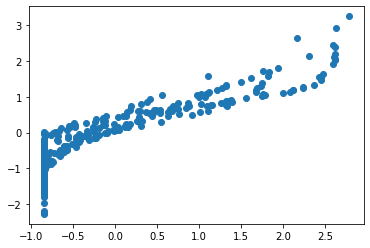

In [109]:
plt.scatter(y_test,regressor.predict(x_test))

# Implementation of Support Vector Regressor

In [8]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [9]:
pipe_steps = [('classifier',SVR())]
tune_params = {'classifier__C':[0.1,10,100],'classifier__gamma':np.logspace(-4,-3,3)}
pipeline = Pipeline(pipe_steps)
print(pipeline)


grid = GridSearchCV(pipeline, param_grid=tune_params,cv=5, n_jobs=-1)
grid.fit(x_train,y_train) 
print(grid.best_params_)

Pipeline(steps=[('classifier', SVR())])
{'classifier__C': 100, 'classifier__gamma': 0.001}


In [10]:
svr = SVR(C = 100,gamma = 0.001)
svr.fit(x_train,y_train)
print('MSE:', metrics.mean_squared_error(y_test, svr.predict(x_test)))

MSE: 0.10504617371495233


In [11]:
print('R2:',r2_score(y_test, svr.predict(x_test)))

R2: 0.8988492009992236


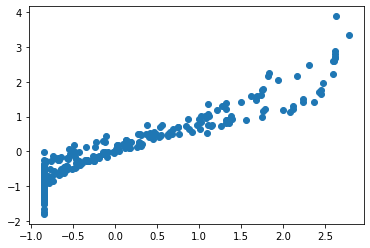

In [12]:
plt.scatter(y_test,svr.predict(x_test))

# Implementation of RandomForestRegressor

In [27]:
from sklearn.model_selection import GridSearchCV 
param_grid = {
    'bootstrap': [True,False],
    'max_depth': np.arange(5,10),
    'n_estimators': [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)

{'bootstrap': True, 'max_depth': 9, 'n_estimators': 100}


In [28]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(n_estimators = 100,bootstrap = True, max_depth = 9)
rfg.fit(x_train, y_train)
preds = rfg.predict(x_test)

In [29]:
print('MSE:', metrics.mean_squared_error(y_test, rfg.predict(x_test)))

MSE: 0.3063102049071996


In [45]:
print('R2:',r2_score(y_test, rfg.predict(x_test)))

R2: 0.7050485432003454


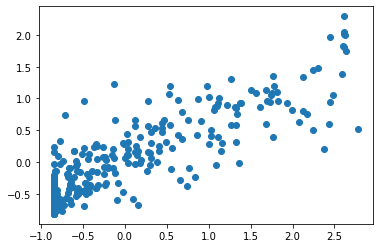

In [30]:
plt.scatter(y_test,rfg.predict(x_test))

# Loading Test data

In [28]:
Test_data = pd.read_csv('CE802_P3_Test.csv')
Test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.37,4.22,-4.05,Very high,UK,83.43,-209.02,101.94,-17.16,2,7.89,10,2373.57,13.11,30843.16,-962.72,NaN
1,-39.37,7.72,-3.48,Very low,Rest,48.30,86.62,107.56,-11.00,18,1.86,10,1475.76,11.71,15657.13,-305.24,NaN
2,16.25,7.08,-5.31,Very low,Europe,1.98,-267.34,23.33,-14.66,8,25.92,6,192.93,17.60,10765.05,-857.16,NaN
3,23.08,5.82,-5.91,Very low,UK,11.49,-196.52,115.19,-12.14,2,12.87,0,2779.23,13.59,14778.80,-798.06,NaN
4,-21.30,15.14,-4.02,Medium,USA,0.60,-80.36,75.42,-8.86,10,4.26,8,-441.42,13.62,16328.25,-832.93,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-57.87,12.40,2.49,High,Rest,1.38,-177.42,83.62,-7.92,4,25.50,8,-972.24,13.03,759.73,-386.14,NaN
1496,21.68,0.78,-20.67,Low,Europe,0.12,-201.76,86.31,-22.86,10,37.29,12,1242.36,14.88,17387.53,-206.36,NaN
1497,-31.42,4.22,-0.87,High,UK,0.78,-172.06,81.60,-23.84,6,4.80,10,171.54,12.94,16194.88,-958.85,NaN
1498,-58.14,20.62,-18.54,Very high,Rest,19.89,-170.60,113.27,-14.42,6,15.75,6,323.04,16.26,20268.69,-823.28,NaN


# Prepare data(Preprocessing)

In [29]:
Test_data.drop('Target',axis=1,inplace=True)
Test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16
0,-39.37,4.22,-4.05,Very high,UK,83.43,-209.02,101.94,-17.16,2,7.89,10,2373.57,13.11,30843.16,-962.72
1,-39.37,7.72,-3.48,Very low,Rest,48.30,86.62,107.56,-11.00,18,1.86,10,1475.76,11.71,15657.13,-305.24
2,16.25,7.08,-5.31,Very low,Europe,1.98,-267.34,23.33,-14.66,8,25.92,6,192.93,17.60,10765.05,-857.16
3,23.08,5.82,-5.91,Very low,UK,11.49,-196.52,115.19,-12.14,2,12.87,0,2779.23,13.59,14778.80,-798.06
4,-21.30,15.14,-4.02,Medium,USA,0.60,-80.36,75.42,-8.86,10,4.26,8,-441.42,13.62,16328.25,-832.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-57.87,12.40,2.49,High,Rest,1.38,-177.42,83.62,-7.92,4,25.50,8,-972.24,13.03,759.73,-386.14
1496,21.68,0.78,-20.67,Low,Europe,0.12,-201.76,86.31,-22.86,10,37.29,12,1242.36,14.88,17387.53,-206.36
1497,-31.42,4.22,-0.87,High,UK,0.78,-172.06,81.60,-23.84,6,4.80,10,171.54,12.94,16194.88,-958.85
1498,-58.14,20.62,-18.54,Very high,Rest,19.89,-170.60,113.27,-14.42,6,15.75,6,323.04,16.26,20268.69,-823.28


In [30]:
Test_data1 = pd.get_dummies(Test_data,columns=['F5'])

In [31]:
cl = {"F4": {"Very low":0, "Low":1, "Medium":2,"High":3,"Very high":4}}
Test_data1.replace(cl, inplace=True)
Test_data1.head()

,F1,F2,F3,F4,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F5_Europe,F5_Rest,F5_UK,F5_USA
0,-39.37,4.22,-4.05,4,83.43,-209.02,101.94,-17.16,2,7.89,10,2373.57,13.11,30843.16,-962.72,0,0,1,0
1,-39.37,7.72,-3.48,0,48.30,86.62,107.56,-11.00,18,1.86,10,1475.76,11.71,15657.13,-305.24,0,1,0,0
2,16.25,7.08,-5.31,0,1.98,-267.34,23.33,-14.66,8,25.92,6,192.93,17.60,10765.05,-857.16,1,0,0,0
3,23.08,5.82,-5.91,0,11.49,-196.52,115.19,-12.14,2,12.87,0,2779.23,13.59,14778.80,-798.06,0,0,1,0
4,-21.30,15.14,-4.02,2,0.60,-80.36,75.42,-8.86,10,4.26,8,-441.42,13.62,16328.25,-832.93,0,0,0,1


# Linear Regression Model

In [32]:
y1 = data['Target']
data.drop('Target',axis=1,inplace=True)
x1 = data

In [33]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.20,random_state=0)
regressor.fit(x_train1,y_train1)

LinearRegression()

# Predicting Target

In [34]:
Target = regressor.predict(Test_data1)

# Addding Target column to Test Data

In [35]:
Test_data['Target'] = Target
Test_data.to_csv('TESTTEST.csv')